In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import keras
from zipfile import ZipFile
import pickle
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from keras.preprocessing import timeseries_dataset_from_array as ts_split
from keras import layers as kl

In [3]:
# Open the pickle file
df = pickle.load(open('../../data/processed/merged_data_202506101515.pkl', 'rb'))
df

,AAL_%Chg,ALGT_%Chg,ALK_%Chg,DAL_%Chg,ITA_%Chg,IYT_%Chg,JBLU_%Chg,JETS_%Chg,LUV_%Chg,UAL_%Chg,...,PCA_GKG1_0_ALGT_rolling_sum26,PCA_GKG1_0_ALGT_rolling_mean26,PCA_GKG1_1_ALGT_rolling_sum26,PCA_GKG1_1_ALGT_rolling_mean26,PCA_GKG1_2_ALGT_rolling_sum26,PCA_GKG1_2_ALGT_rolling_mean26,PCA_GKG1_3_ALGT_rolling_sum26,PCA_GKG1_3_ALGT_rolling_mean26,Article Count_ALGT_rolling_sum26,Article Count_ALGT_rolling_mean26
Time,,,,,,,,,,,,,,,,,,,,,
2018-01-02 09:30:00,0.13,0.52,1.31,0.31,0.08,0.80,0.13,0.68,0.49,0.43,...,0.143512,0.143512,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338
2018-01-02 09:45:00,0.19,-0.88,0.05,-0.13,-0.12,0.07,-0.25,-0.04,0.43,-0.25,...,0.143512,0.143512,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338
2018-01-02 10:00:00,-0.08,1.09,0.18,0.22,0.17,0.23,0.27,0.32,-0.18,0.13,...,0.143512,0.143512,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338
2018-01-02 10:15:00,0.02,-0.03,0.20,0.03,-0.16,-0.29,-0.38,-0.01,-0.27,0.28,...,0.143512,0.143512,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338
2018-01-02 10:30:00,0.04,-0.74,0.05,0.30,-0.18,-0.09,-0.04,-0.08,0.30,0.24,...,0.143512,0.143512,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-05-30 14:45:00,0.22,0.13,0.09,0.02,0.10,0.12,0.39,0.09,0.12,0.29,...,-0.393287,-0.393287,-0.569264,-0.569264,-0.453739,-0.453739,-0.626512,-0.626512,-0.146048,-0.146048
2025-05-30 15:00:00,0.09,-0.03,-0.09,0.21,0.11,0.02,-0.39,0.07,0.21,0.05,...,-0.393287,-0.393287,-0.569264,-0.569264,-0.453739,-0.453739,-0.626512,-0.626512,-0.146048,-0.146048
2025-05-30 15:15:00,0.26,0.21,0.24,0.35,0.22,0.18,0.29,0.22,0.21,0.49,...,-0.393287,-0.393287,-0.569264,-0.569264,-0.453739,-0.453739,-0.626512,-0.626512,-0.146048,-0.146048


In [4]:
df.filter(like='AAL').columns

Index(['AAL_%Chg', 'AAL_Change', 'AAL_High', 'AAL_High-Low', 'AAL_High-Low%',
       'AAL_Last', 'AAL_Last-Open', 'AAL_Last-Open%', 'AAL_Last_Lag1',
       'AAL_Last_Lag10', 'AAL_Last_Lag11', 'AAL_Last_Lag12', 'AAL_Last_Lag2',
       'AAL_Last_Lag3', 'AAL_Last_Lag4', 'AAL_Last_Lag5', 'AAL_Last_Lag6',
       'AAL_Last_Lag7', 'AAL_Last_Lag8', 'AAL_Last_Lag9', 'AAL_LogReturn',
       'AAL_Low', 'AAL_MA12_Last', 'AAL_MA12_Last_Lag1', 'AAL_MA12_Last_Lag10',
       'AAL_MA12_Last_Lag11', 'AAL_MA12_Last_Lag12', 'AAL_MA12_Last_Lag2',
       'AAL_MA12_Last_Lag3', 'AAL_MA12_Last_Lag4', 'AAL_MA12_Last_Lag5',
       'AAL_MA12_Last_Lag6', 'AAL_MA12_Last_Lag7', 'AAL_MA12_Last_Lag8',
       'AAL_MA12_Last_Lag9', 'AAL_MA4_Last', 'AAL_MA4_Last_Lag1',
       'AAL_MA4_Last_Lag10', 'AAL_MA4_Last_Lag11', 'AAL_MA4_Last_Lag12',
       'AAL_MA4_Last_Lag2', 'AAL_MA4_Last_Lag3', 'AAL_MA4_Last_Lag4',
       'AAL_MA4_Last_Lag5', 'AAL_MA4_Last_Lag6', 'AAL_MA4_Last_Lag7',
       'AAL_MA4_Last_Lag8', 'AAL_MA4_Last_L

In [5]:
# Data preprocessing
y_cols = ['AAL_%Chg']
#x_cols = ['AAL_Last','ALGT_Last','ALK_Last','DAL_Last','ITA_Last','IYT_Last','JBLU_Last','JETS_Last','LUV_Last','UAL_Last']
x_cols = ['AAL_%Chg', 'AAL_Change', 'AAL_High', 'AAL_High-Low', 'AAL_High-Low%',
       'AAL_Last', 'AAL_Last-Open', 'AAL_Last-Open%', 'AAL_Open',
       'AAL_Roll_SDSD_Last_10', 'AAL_Roll_SDSD_Volume_10',
       'AAL_Roll_SD_Last_10', 'AAL_Roll_SD_Volume_10', 'AAL_Volume',
       'PCA_GKG1_0_AAL_rolling_sum26','PCA_GKG1_0_AAL_rolling_mean26', 
       'PCA_GKG1_1_AAL_rolling_sum26','PCA_GKG1_1_AAL_rolling_mean26', 
       'PCA_GKG1_2_AAL_rolling_sum26','PCA_GKG1_2_AAL_rolling_mean26', 
       'PCA_GKG1_3_AAL_rolling_sum26','PCA_GKG1_3_AAL_rolling_mean26', 
       'Article Count_AAL_rolling_sum26','Article Count_AAL_rolling_mean26']

y = df[y_cols]
x = df[x_cols]

In [6]:
# Train/text splitting
split_val  = round(0.7 * len(x))
split_test = round(0.9 * len(x))

x_train = x[:split_val]
x_val   = x[split_val:split_test]
x_test  = x[split_test:]

y_train = y[:split_val]
y_val   = y[split_val:split_test]
y_test  = y[split_test:]

In [7]:
# Normalize the features to [0,1]
sc = MinMaxScaler(feature_range=(0, 1))

x_train = sc.fit_transform(x_train)
x_test  = sc.fit_transform(x_test)
x_val   = sc.fit_transform(x_val)
y_train = sc.fit_transform(y_train)
y_test  = sc.fit_transform(y_test)
y_val   = sc.fit_transform(y_val)

y_train

array([[0.27864583],
       [0.27984776],
       [0.2744391 ],
       ...,
       [0.27964744],
       [0.2802484 ],
       [0.27844551]])

In [23]:
y_train.shape

(33796, 1)

In [8]:
y_train.shape

(33796, 1)

In [9]:
x_train[0:2]

array([[0.27864583, 0.39041794, 0.87047299, 0.14761905, 0.02527491,
        0.86674838, 0.47591568, 0.44367005, 0.87109529, 0.01434041,
        0.00721804, 0.02893554, 0.00859106, 0.00355674, 0.54208371,
        0.06482854, 0.45678471, 0.98799498, 0.49184507, 1.        ,
        0.46166756, 0.9828192 , 0.47339214, 1.        ],
       [0.27984776, 0.39347604, 0.86483277, 0.11111111, 0.01857548,
        0.86872541, 0.39818631, 0.41785715, 0.86654804, 0.01488392,
        0.00838848, 0.02863297, 0.00850211, 0.00342815, 0.54208371,
        0.15982694, 0.45678471, 0.90145921, 0.49184507, 0.94936563,
        0.46166756, 0.89236451, 0.47339214, 0.94892638]])

In [10]:
def create_tensor(data, type:str, steps_historical=26, steps_future=6, skiprows=1):
    # Need to fix skiprows to make the output data shorter

    tot_length = len(data) - steps_historical - steps_future + 1

    if type.lower() == 'x':
        x_tensor = np.zeros(shape=(tot_length, steps_historical, data.shape[1]))
        for i in range(0, tot_length, skiprows):
            j = i + steps_historical
            x_tensor[i] = data[i:j]
        return x_tensor
    
    elif type.lower() == 'y':
        y_tensor = np.zeros(shape=(tot_length, steps_future, data.shape[1]))
        for i in range(0, tot_length, skiprows):
            j = i + steps_historical
            k = j + steps_future
            y_tensor[i] = data[j:k]
        return y_tensor
    
    else:
        raise ValueError("Type must be 'x' or 'y'.")

In [11]:
steps_historical = 12
steps_future = 12

x_tensor_train = create_tensor(x_train, type='x', steps_historical=steps_historical, steps_future=steps_future)
x_tensor_test  = create_tensor(x_test , type='x', steps_historical=steps_historical, steps_future=steps_future)
x_tensor_val   = create_tensor(x_val  , type='x', steps_historical=steps_historical, steps_future=steps_future)
y_tensor_train = create_tensor(y_train, type='y', steps_historical=steps_historical, steps_future=steps_future)
y_tensor_test  = create_tensor(y_test , type='y', steps_historical=steps_historical, steps_future=steps_future)
y_tensor_val   = create_tensor(y_val  , type='y', steps_historical=steps_historical, steps_future=steps_future)

In [12]:
for i in ['x_tensor_train', 'x_tensor_test', 'x_tensor_val', 'y_tensor_train', 'y_tensor_test', 'y_tensor_val']:
    print(f"{i} shape: {eval(i).shape}")

x_tensor_train shape: (33773, 12, 24)
x_tensor_test shape: (4805, 12, 24)
x_tensor_val shape: (9633, 12, 24)
y_tensor_train shape: (33773, 12, 1)
y_tensor_test shape: (4805, 12, 1)
y_tensor_val shape: (9633, 12, 1)


In [13]:
y_tensor_val[0].shape

(12, 1)

In [14]:
# Designing the model structure
model = keras.Sequential([
    kl.Input(shape=(steps_historical, len(x_cols))),
    kl.LSTM(15, return_sequences=True),
    kl.Dropout(0.2),
    kl.LSTM(10, return_sequences=True),
    kl.Dense(1)
])

model.compile(
    optimizer = 'adam', 
    loss = 'mae'
    )
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 12, 15)         │         2,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 12, 15)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 12, 10)         │         1,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 12, 1)          │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,451 (13.48 KB)

 Trainable params: 3,451 (13.48 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
# This will monitor validation loss and stop training if it doesn't improve after 5 epochs
es_callback = keras.callbacks.EarlyStopping(monitor="val_loss", min_delta=0, patience=10)

history = model.fit(
    x_tensor_train, 
    y_tensor_train,
    validation_data = (x_tensor_val, y_tensor_val),
    epochs = 50, 
    verbose = 1,
    batch_size = 50,
    callbacks = [es_callback])

Epoch 1/50
676/676 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.0436 - val_loss: 0.3830
Epoch 2/50
676/676 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0083 - val_loss: 0.3819
Epoch 3/50
676/676 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0080 - val_loss: 0.3825
Epoch 4/50
676/676 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0080 - val_loss: 0.3808
Epoch 5/50
676/676 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0079 - val_loss: 0.3826
Epoch 6/50
676/676 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0079 - val_loss: 0.3815
Epoch 7/50
676/676 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0079 - val_loss: 0.3814
Epoch 8/50
676/676 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0079 - val_loss: 0.3816
Epoch 9/50
676/676 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0079 - val_loss: 0.3820
Epoch 10/50
676/676 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0079 - val_loss: 0.3809
Epoch 11/50
676/676 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0079 - val_loss: 0.3810
Epoch 12/50
676/676 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step

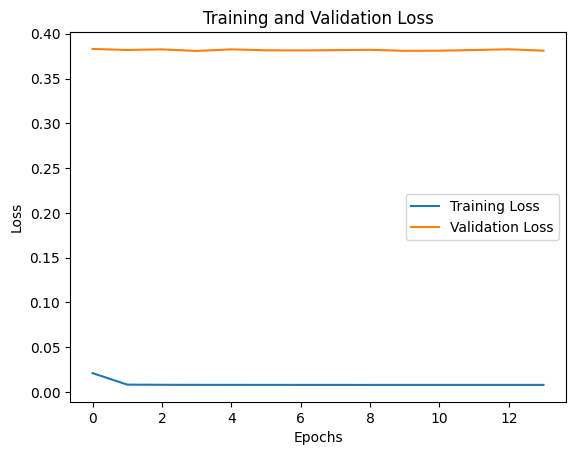

In [16]:
# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [17]:
# Transform y_tensor_val from shape (9633, 12, 1) to (9633, 12)
y_tensor_val = y_tensor_val.reshape(y_tensor_val.shape[0], y_tensor_val.shape[1])
pd.DataFrame(y_tensor_val)

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.630300,0.649948,0.632368,0.638573,0.650982,0.640641,0.626680,0.645295,0.631334,0.666494,0.629266,0.626163
1,0.649948,0.632368,0.638573,0.650982,0.640641,0.626680,0.645295,0.631334,0.666494,0.629266,0.626163,0.680972
2,0.632368,0.638573,0.650982,0.640641,0.626680,0.645295,0.631334,0.666494,0.629266,0.626163,0.680972,0.671665
3,0.638573,0.650982,0.640641,0.626680,0.645295,0.631334,0.666494,0.629266,0.626163,0.680972,0.671665,0.641675
4,0.650982,0.640641,0.626680,0.645295,0.631334,0.666494,0.629266,0.626163,0.680972,0.671665,0.641675,0.649948
...,...,...,...,...,...,...,...,...,...,...,...,...
9628,0.668046,0.665460,0.623578,0.655636,0.826784,0.704757,0.652534,0.683040,0.631851,0.631851,0.651499,0.637022
9629,0.665460,0.623578,0.655636,0.826784,0.704757,0.652534,0.683040,0.631851,0.631851,0.651499,0.637022,0.633402
9630,0.623578,0.655636,0.826784,0.704757,0.652534,0.683040,0.631851,0.631851,0.651499,0.637022,0.633402,0.653051
9631,0.655636,0.826784,0.704757,0.652534,0.683040,0.631851,0.631851,0.651499,0.637022,0.633402,0.653051,0.664943


In [24]:
y_pred = model.predict(x_tensor_val)
#y_pred = sc.inverse_transform(y_pred)
y_pred = y_pred.reshape(y_pred.shape[0], y_pred.shape[1])
pd.DataFrame(y_pred)

302/302 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


,0,1,2,3,4,5,6,7,8,9,10,11
0,0.276868,0.276815,0.276866,0.277156,0.277005,0.277172,0.277251,0.277168,0.277492,0.277377,0.277411,0.277248
1,0.276855,0.276824,0.276871,0.277219,0.276936,0.277233,0.277095,0.277483,0.277370,0.277420,0.277259,0.277214
2,0.276883,0.276866,0.276945,0.277156,0.277026,0.277061,0.277411,0.277352,0.277412,0.277263,0.277222,0.277181
3,0.276837,0.276888,0.276836,0.277254,0.276886,0.277407,0.277302,0.277411,0.277263,0.277234,0.277192,0.277209
4,0.276891,0.276860,0.276893,0.277035,0.277175,0.277246,0.277333,0.277237,0.277219,0.277191,0.277213,0.277210
...,...,...,...,...,...,...,...,...,...,...,...,...
9628,0.276742,0.276683,0.276817,0.277092,0.276960,0.277124,0.277248,0.277307,0.277232,0.277211,0.277165,0.277207
9629,0.276731,0.276680,0.276818,0.277070,0.276952,0.277216,0.277264,0.277231,0.277216,0.277178,0.277219,0.277287
9630,0.276738,0.276665,0.276767,0.277029,0.277018,0.277223,0.277184,0.277211,0.277182,0.277230,0.277299,0.277305
9631,0.276736,0.276631,0.276767,0.277101,0.277047,0.277154,0.277169,0.277180,0.277233,0.277310,0.277316,0.277190


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


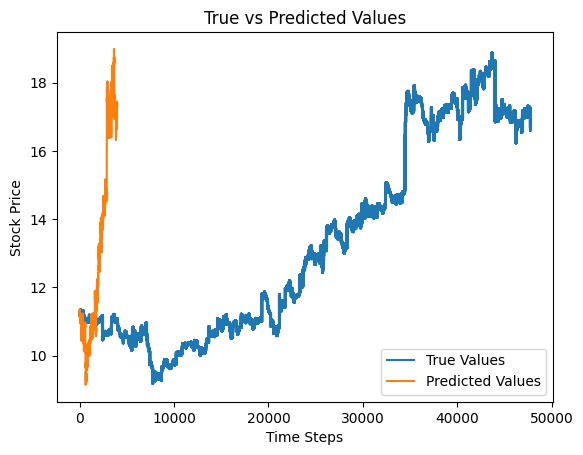

In [127]:
y_pred = model.predict(x_tensor_val).flatten()
y_pred = sc.inverse_transform(y_pred.reshape(-1, 1))


y_eval = sc.inverse_transform(y_tensor_val.flatten().reshape(-1, 1))

plt.plot(y_eval, label='True Values')
plt.plot(y_pred, label='Predicted Values')
plt.title('True vs Predicted Values')
plt.xlabel('Time Steps')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [128]:
predictions = pd.DataFrame(np.hstack((y_eval, y_pred)), columns=['True Values', 'Predicted Values'])
predictions['MAPE'] = 100 * abs((predictions['True Values'] - predictions['Predicted Values']) / predictions['True Values'])
predictions.mean()

ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 47736 and the array at index 1 has size 3978

In [90]:
predictions

,True Values,Predicted Values,MAPE
0,19.677535,18.635502,5.295546
1,19.623557,18.628147,5.072527
2,19.549338,18.595335,4.879978
3,19.530581,18.543562,5.053712
4,19.583074,18.517843,5.439550
...,...,...,...
1940,12.822409,12.962421,1.091934
1941,12.835904,12.975033,1.083907
1942,12.876387,12.986683,0.856578
1943,12.856280,13.029459,1.347038


In [71]:
# Predicting on the test set and plotting the results
predictions = model.predict(dataset_test)
predictions = predictions.reshape(-1, len(y_cols))
# Inverse transform the predictions and actual values
predictions = sc.inverse_transform(predictions)
predictions

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


array([[13.398315 , 71.36834  , 54.333954 , ...,  6.145635 , 31.93161  ,
        81.79915  ],
       [13.290259 , 70.35036  , 54.740807 , ...,  6.1424336, 32.09865  ,
        81.15575  ],
       [13.225269 , 68.630714 , 55.365253 , ...,  6.1714272, 32.071114 ,
        80.89167  ],
       ...,
       [12.657994 , 72.1708   , 54.409004 , ...,  5.64687  , 31.43997  ,
        93.8736   ],
       [12.604883 , 71.907265 , 54.49948  , ...,  5.6565123, 31.443684 ,
        94.13033  ],
       [12.623931 , 71.81959  , 54.600266 , ...,  5.6525955, 31.446852 ,
        94.227844 ]], dtype=float32)